In [2]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
nat_unemp_gen = pd.read_csv('Industry_Unemployment_By_Gender.csv')
nat_unemp_gen.head()

,Year,Men,Women
0,2020,2.7,3.2
1,2019,1.8,2.4
2,2018,2.1,2.3
3,2017,2.3,2.9
4,2016,2.3,3.1


In [ ]:
#nat_unemp_gen.dropna()

In [4]:
X = nat_unemp_gen[["Men", "Women"]]
y = nat_unemp_gen["Year"].values.reshape(-1, 1)
print(X.shape, y.shape)

(19, 2) (19, 1)


In [5]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["Men", "Women"])
data_binary_encoded.head()

,Men_1.8,Men_2.1,Men_2.3,Men_2.4,Men_2.5,Men_2.7,Men_3.3,Men_3.4,Men_3.8,Men_4.0,...,Women_2.9,Women_3.1,Women_3.2,Women_3.3,Women_4.2,Women_4.5,Women_4.6,Women_4.7,Women_5.0,Women_5.7
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,Men,Women
0,2.7,3.2
1,1.8,2.4
2,2.1,2.3
3,2.3,2.9
4,2.3,3.1


In [7]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Men,Women
16,4.0,4.5
3,2.3,2.9
13,2.1,2.3
15,2.7,3.3
17,5.8,4.6


In [8]:
 from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

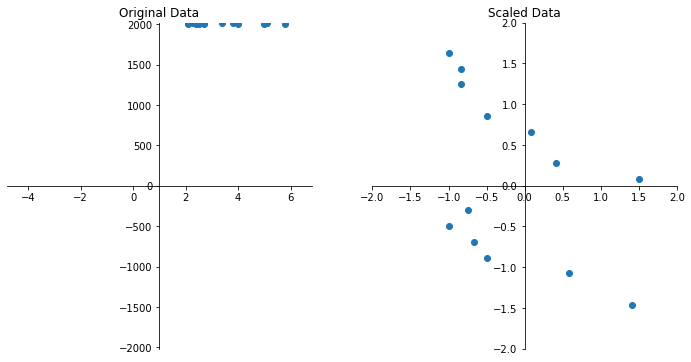

In [10]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Men"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Men"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

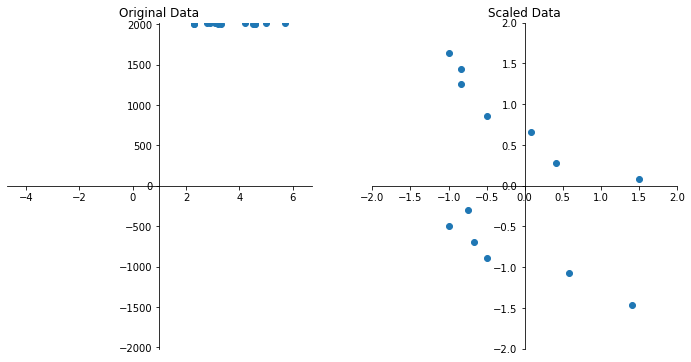

In [11]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Women"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Women"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [14]:
X = pd.get_dummies(nat_unemp_gen[["Men", "Women"]])
y = nat_unemp_gen["Year"].values.reshape(-1, 1)
X.head()

,Men,Women
0,2.7,3.2
1,1.8,2.4
2,2.1,2.3
3,2.3,2.9
4,2.3,3.1


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
 from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

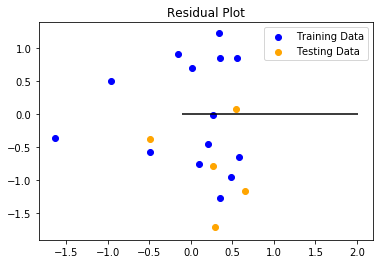

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.0138654661248334, R2: -0.5807062440531925
